# Question3

## Load Dataset

In [25]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()


df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitter Function

In [27]:
import random
def train_test_split(df, test_size, random_state=81):
    random.seed(random_state)
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

# Preprocessing Data

### Unprocessed columns

In [28]:
train_df, test_df = train_test_split(df, test_size=0.4)
print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")


Training set size: (90, 5)
Testing set size: (60, 5)


### Normalization   

In [29]:
normalised_df = df.copy()
columns = normalised_df.columns[:]
columns = columns.drop('target') # we dont want to normalise the target column
for column in columns:
    for x in df[column]:
        x = x-min(df[column])/(max(df[column])-min(df[column]))

normalised_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
train_df_normalized, test_df_normalized = train_test_split(normalised_df, test_size=0.4)
print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")

Training set size: (90, 5)
Testing set size: (60, 5)


### Standardization

In [31]:
standardized_df = df.copy()
columns = standardized_df.columns[:]
columns = columns.drop('target') # we dont want to standardize the target column
for column in columns:
    mean = df[column].mean()
    std = df[column].std()
    for x in df[column]:
        x = (x-mean)/std

standardized_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
train_df_standardized, test_df_standardized = train_test_split(standardized_df, test_size=0.4)
print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")

Training set size: (90, 5)
Testing set size: (60, 5)


# Softmax + Multiclass Regression

In [33]:
import numpy as np  
import logging
import matplotlib.pyplot as plt
import re

class SoftmaxMulticlassClassification:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def softmax(self, z):
        exp_z = np.exp(z)/np.sum(np.exp(z), axis=-1, keepdims=True)
        return exp_z 
    
    def reset_logging(self):
        # Clear existing handlers
        for handler in logging.root.handlers[:]:
            logging.root.removeHandler(handler)
    
    def draw_graph(self, log_file):
        iterations = []
        losses = []

        with open(log_file, "r") as f:
            for line in f:
                match = re.search(r"Iteration (\d+), Loss: ([\d\.]+)", line)
                if match:
                    iterations.append(int(match.group(1)))
                    losses.append(float(match.group(2)))

        
        plt.plot(iterations, losses, marker='o')
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Loss vs Iteration")
        plt.grid(True)
        plt.show()

    def train_bgd(self, X, y, log_file, learning_rate=0.01, n_iters=10000, graph = True):
        self.reset_logging()
        logging.basicConfig(filename=log_file, level=logging.INFO)
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        self.weights = np.random.rand(n_features, n_classes)
        self.bias = np.zeros(n_classes)

        y_one_hot = np.zeros((n_samples, n_classes))
        y_one_hot[np.arange(n_samples), y] = 1
        
        for i in range(n_iters):

            logits = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(logits)
            loss = x-np.mean(np.sum(y_one_hot * np.log(y_predicted), axis=1))
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_one_hot))
            db = (1 / n_samples) * np.sum(y_predicted - y_one_hot, axis=0)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
            if i % 100 == 0:
                logging.info(f"Iteration {i}, Loss: {loss:.4f}")

        if graph:
            self.draw_graph(log_file)

        
    
    def train_sgd(self, X, y, log_file, learning_rate=0.01, n_iters=10000, graph = True):
        self.reset_logging()
        logging.basicConfig(filename=log_file, level=logging.INFO)
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        self.weights = np.random.rand(n_features, n_classes)
        self.bias = np.zeros(n_classes)
        
        for i in range(n_iters):
            for j in range(n_samples):
                logits = np.dot(X[j], self.weights) + self.bias
                y_predicted = self.softmax(logits)
                
                y_true = np.zeros(n_classes)
                y_true[y[j]] = 1
                
                loss = -np.log(y_predicted[y[j]] + 1e-9)
                
                dw = np.outer(X[j], (y_predicted - y_true))
                db = y_predicted - y_true
                
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db
            
            if i % 100 == 0:
                logging.info(f"Iteration {i}, Loss: {loss:.4f}")
        
        if graph:
            self.draw_graph(log_file)
    
    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(logits)
        y_predicted_class = np.argmax(y_predicted, axis=1)
        return y_predicted_class
    
    def evaluate_model(self, X_test, y_test):
        y_pred = self.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        print("Accuracy: {:.4f}".format(accuracy))
        
        classes = np.unique(np.concatenate((y_test, y_pred)))
        n_classes = len(classes)
        
        conf_matrix = np.zeros((n_classes, n_classes), dtype=int)
        for true_label, pred_label in zip(y_test, y_pred):
            conf_matrix[true_label, pred_label] += 1
        
        print("\nConfusion Matrix:")
        print(conf_matrix)
        
        print("\nClassification Report:")
        print("Class\tPrecision\tRecall\tF1-Score\tSupport")
        for cls in classes:
            tp = conf_matrix[cls, cls]
            fp = conf_matrix[:, cls].sum() - tp
            fn = conf_matrix[cls, :].sum() - tp
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
            support = conf_matrix[cls, :].sum()
            print(f"{cls}\t{precision:.4f}\t\t{recall:.4f}\t{f1_score:.4f}\t\t{support}")
            

# Training + Evaluation

## Unprocessed Data

### Batch Gradient Descent

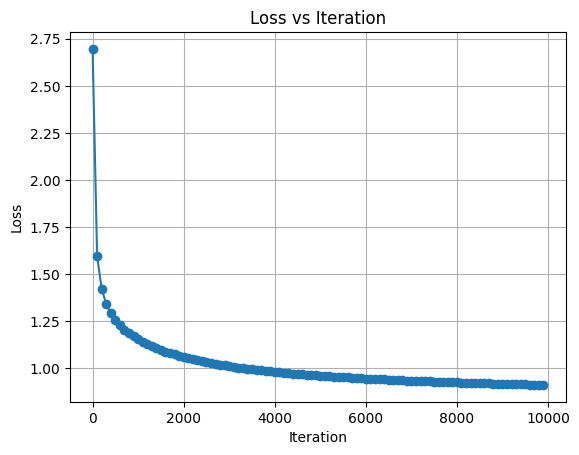

Accuracy: 0.9667

Confusion Matrix:
[[21  0  0]
 [ 0 19  2]
 [ 0  0 18]]

Classification Report:
Class	Precision	Recall	F1-Score	Support
0	1.0000		1.0000	1.0000		21
1	1.0000		0.9048	0.9500		21
2	0.9000		1.0000	0.9474		18


In [34]:
SoftmaxMulticlassClassificationbgd = SoftmaxMulticlassClassification()

X = train_df.drop('target', axis=1).values
y = train_df['target'].values

SoftmaxMulticlassClassificationbgd.train_bgd(X, y,"unprocessedbgd.log", learning_rate=0.01, n_iters=10000)

X_test = test_df.drop('target', axis=1).values
y_test = test_df['target'].values

SoftmaxMulticlassClassificationbgd.evaluate_model(X_test, y_test)

### Stochastic Gradient Descent

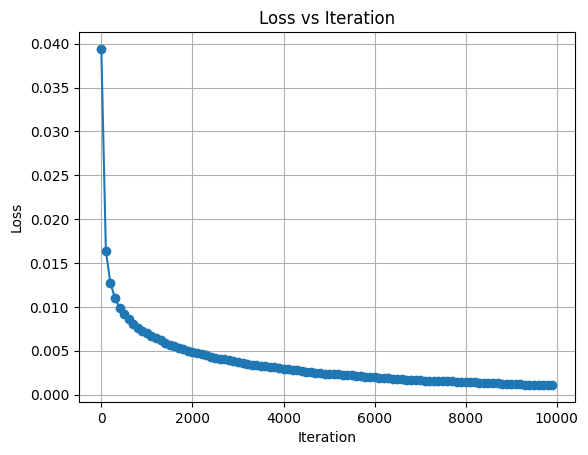

Accuracy: 0.9833

Confusion Matrix:
[[21  0  0]
 [ 0 20  1]
 [ 0  0 18]]

Classification Report:
Class	Precision	Recall	F1-Score	Support
0	1.0000		1.0000	1.0000		21
1	1.0000		0.9524	0.9756		21
2	0.9474		1.0000	0.9730		18


In [35]:
SoftmaxMulticlassClassificationsgd = SoftmaxMulticlassClassification()

X = train_df.drop('target', axis=1).values
y = train_df['target'].values

SoftmaxMulticlassClassificationsgd.train_sgd(X, y,"unprocessedsgd.log", learning_rate=0.01, n_iters=10000)

X_test = test_df.drop('target', axis=1).values
y_test = test_df['target'].values

SoftmaxMulticlassClassificationsgd.evaluate_model(X_test, y_test)

## Normalized Data

### Batch Gradient Descent

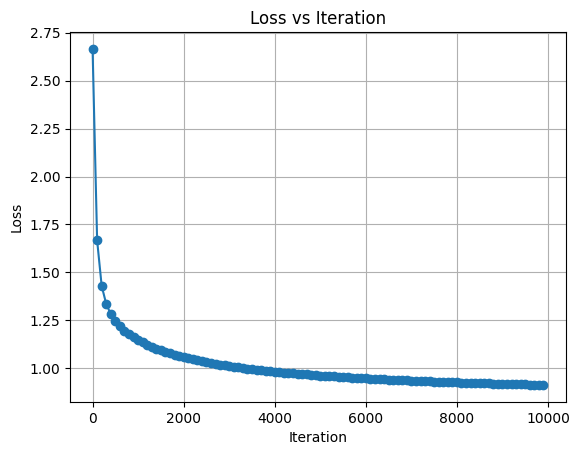

Accuracy: 0.9667

Confusion Matrix:
[[21  0  0]
 [ 0 19  2]
 [ 0  0 18]]

Classification Report:
Class	Precision	Recall	F1-Score	Support
0	1.0000		1.0000	1.0000		21
1	1.0000		0.9048	0.9500		21
2	0.9000		1.0000	0.9474		18


In [36]:
SoftmaxMulticlassClassificationbgd_normalized = SoftmaxMulticlassClassification()

X = train_df_normalized.drop('target', axis=1).values
y = train_df_normalized['target'].values

SoftmaxMulticlassClassificationbgd_normalized.train_bgd(X, y, "normalizedbgd.log", learning_rate=0.01, n_iters=10000)

X_test = test_df_normalized.drop('target', axis=1).values
y_test = test_df_normalized['target'].values

SoftmaxMulticlassClassificationbgd_normalized.evaluate_model(X_test, y_test)

### Stochastic Gradient Descent

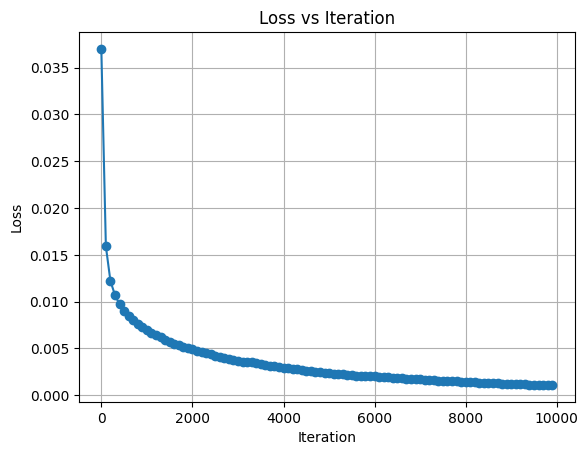

Accuracy: 0.9833

Confusion Matrix:
[[21  0  0]
 [ 0 20  1]
 [ 0  0 18]]

Classification Report:
Class	Precision	Recall	F1-Score	Support
0	1.0000		1.0000	1.0000		21
1	1.0000		0.9524	0.9756		21
2	0.9474		1.0000	0.9730		18


In [37]:
SoftmaxMulticlassClassificationsgd_normalized = SoftmaxMulticlassClassification()

X = train_df_normalized.drop('target', axis=1).values
y = train_df_normalized['target'].values

SoftmaxMulticlassClassificationsgd_normalized.train_sgd(X, y, "normalizedsgd.log", learning_rate=0.01, n_iters=10000)

X_test = test_df_normalized.drop('target', axis=1).values
y_test = test_df_normalized['target'].values

SoftmaxMulticlassClassificationsgd_normalized.evaluate_model(X_test, y_test)

## Standardized Data

### Batch Gradient Descent

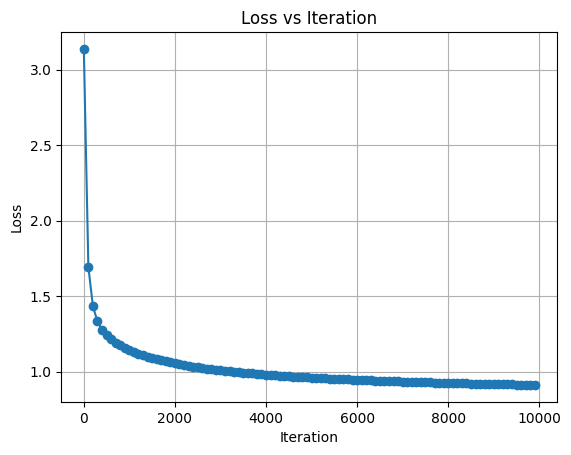

Accuracy: 0.9667

Confusion Matrix:
[[21  0  0]
 [ 0 19  2]
 [ 0  0 18]]

Classification Report:
Class	Precision	Recall	F1-Score	Support
0	1.0000		1.0000	1.0000		21
1	1.0000		0.9048	0.9500		21
2	0.9000		1.0000	0.9474		18


In [38]:
SoftmaxMulticlassClassificationbgd_standardized = SoftmaxMulticlassClassification()

X = train_df_standardized.drop('target', axis=1).values
y = train_df_standardized['target'].values

SoftmaxMulticlassClassificationbgd_standardized.train_bgd(X, y, "standardizedbgd.log", learning_rate=0.01, n_iters=10000)

X_test = test_df_standardized.drop('target', axis=1).values
y_test = test_df_standardized['target'].values

SoftmaxMulticlassClassificationbgd_standardized.evaluate_model(X_test, y_test)

### Stochastic Gradient Descent

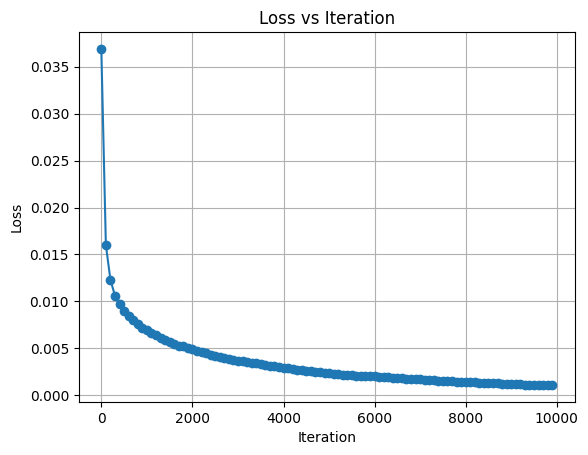

Accuracy: 0.9833

Confusion Matrix:
[[21  0  0]
 [ 0 20  1]
 [ 0  0 18]]

Classification Report:
Class	Precision	Recall	F1-Score	Support
0	1.0000		1.0000	1.0000		21
1	1.0000		0.9524	0.9756		21
2	0.9474		1.0000	0.9730		18


In [39]:
SoftmaxMulticlassClassificationsgd_standardized = SoftmaxMulticlassClassification()

X = train_df_standardized.drop('target', axis=1).values
y = train_df_standardized['target'].values

SoftmaxMulticlassClassificationsgd_standardized.train_sgd(X, y, "standardizedsgd.log", learning_rate=0.01, n_iters=10000)

X_test = test_df_standardized.drop('target', axis=1).values
y_test = test_df_standardized['target'].values

SoftmaxMulticlassClassificationsgd_standardized.evaluate_model(X_test, y_test)